In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import math
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import scipy
from scipy.stats import spearmanr
from decimal import Decimal

GenGB2021 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_GB_20210101-20211231.csv")

GenGB2021 = GenGB2021.replace('n/e', np.NaN)
GenGB2021 = GenGB2021.replace('N/A', np.NaN)



GenGB2021 = pd.DataFrame({'Date': GenGB2021.iloc[:,1],
                          'SP': GenGB2021.iloc[:,2],
                          'Wind [MW]': GenGB2021.iloc[:,7],
                          'PSH [MW]': GenGB2021.iloc[:,8],
                          'Hydro [MW]': GenGB2021.iloc[:,9],
                          'Nuclear [MW]': GenGB2021.iloc[:,6],
                          'Gas [MW]': GenGB2021.iloc[:,3]+GenGB2021.iloc[:,10],
                          'Oil [MW]': GenGB2021.iloc[:,4],
                          'Coal [MW]': GenGB2021.iloc[:,5],
                          'Biomass [MW]': GenGB2021.iloc[:,16]})

print(GenGB2021.to_string())

           Date  SP  Wind [MW]  PSH [MW]  Hydro [MW]  Nuclear [MW]  Gas [MW]  Oil [MW]  Coal [MW]  Biomass [MW]
0      20210101   1       4489         0         383          5955     11338         0          0          3116
1      20210101   2       4351         0         379          5951     11497         0          0          3115
2      20210101   3       4258         0         349          5947     10863         0          0          3105
3      20210101   4       4265         0         334          5951     10248         0          0          3114
4      20210101   5       4365         0         328          5951      9656         0          0          3116
5      20210101   6       4466         0         327          5952      9172         0          0          3116
6      20210101   7       4404         0         320          5948      9246         0          0          3115
7      20210101   8       4404         0         315          5948      8721         0          0       

In [2]:


def function():
    result = []
    for i in range(0, len(GenGB2021.iloc[:,0])):
        if i < 86:
            start = 48*i
            end = 48*(i+1)
            day = GenGB2021.iloc[start,0]
            opWi = sum(GenGB2021.iloc[start:end,2])/2
            opPS = sum(GenGB2021.iloc[start:end,3])/2
            opHy = sum(GenGB2021.iloc[start:end,4])/2
            opNu = sum(GenGB2021.iloc[start:end,5])/2
            opGa = sum(GenGB2021.iloc[start:end,6])/2
            opOi = sum(GenGB2021.iloc[start:end,7])/2
            opCo = sum(GenGB2021.iloc[start:end,8])/2
            opBi = sum(GenGB2021.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
        elif i == 86: # For some reason this day does not show in the DataFrame
            start = 48*i
            end = 4174
            day = GenGB2021.iloc[start,0]
            opWi = sum(GenGB2021.iloc[start:end,2])/2
            opPS = sum(GenGB2021.iloc[start:end,3])/2
            opHy = sum(GenGB2021.iloc[start:end,4])/2
            opNu = sum(GenGB2021.iloc[start:end,5])/2
            opGa = sum(GenGB2021.iloc[start:end,6])/2
            opOi = sum(GenGB2021.iloc[start:end,7])/2
            opCo = sum(GenGB2021.iloc[start:end,8])/2
            opBi = sum(GenGB2021.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
        elif 87 <= i < 303:
            start = 48*i-2
            end = 48*(i+1)-2
            day = GenGB2021.iloc[start,0]
            opWi = sum(GenGB2021.iloc[start:end,2])/2
            opPS = sum(GenGB2021.iloc[start:end,3])/2
            opHy = sum(GenGB2021.iloc[start:end,4])/2
            opNu = sum(GenGB2021.iloc[start:end,5])/2
            opGa = sum(GenGB2021.iloc[start:end,6])/2
            opOi = sum(GenGB2021.iloc[start:end,7])/2
            opCo = sum(GenGB2021.iloc[start:end,8])/2
            opBi = sum(GenGB2021.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
        elif i == 303:
            start = 48*i
            end = 14592
            day = GenGB2021.iloc[start,0]
            opWi = sum(GenGB2021.iloc[start:end,2])/2
            opPS = sum(GenGB2021.iloc[start:end,3])/2
            opHy = sum(GenGB2021.iloc[start:end,4])/2
            opNu = sum(GenGB2021.iloc[start:end,5])/2
            opGa = sum(GenGB2021.iloc[start:end,6])/2
            opOi = sum(GenGB2021.iloc[start:end,7])/2
            opCo = sum(GenGB2021.iloc[start:end,8])/2
            opBi = sum(GenGB2021.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
        elif 304 <= i < 365:
            start = 48*i
            end = 48*(i+1)
            day = GenGB2021.iloc[start,0]
            opWi = sum(GenGB2021.iloc[start:end,2])/2
            opPS = sum(GenGB2021.iloc[start:end,3])/2
            opHy = sum(GenGB2021.iloc[start:end,4])/2
            opNu = sum(GenGB2021.iloc[start:end,5])/2
            opGa = sum(GenGB2021.iloc[start:end,6])/2
            opOi = sum(GenGB2021.iloc[start:end,7])/2
            opCo = sum(GenGB2021.iloc[start:end,8])/2
            opBi = sum(GenGB2021.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
    df = pd.DataFrame(result, columns=['Day','Wind [MWh]','PSH [MWh]', 'Hydro [MWh]', 'Nuclear [MWh]', 'Gas [MWh]',
                                       'Oil [MWh]', 'Coal [MWh]', 'Biomass [MWh]'])
    return df

GBGen2021 = function().round(2)
GBGen2021["Day"] = pd.date_range(start="1/1/2021", periods=365, freq="D")
print(GBGen2021.to_string())

           Day  Wind [MWh]  PSH [MWh]  Hydro [MWh]  Nuclear [MWh]  Gas [MWh]  Oil [MWh]  Coal [MWh]  Biomass [MWh]
0   2021-01-01    100321.0     2955.0      10248.0       142519.0   325614.5        0.0     12447.5        73564.0
1   2021-01-02     89471.0     4057.0       9726.0       142286.0   369062.5        0.0     20511.5        58921.5
2   2021-01-03    149102.5     3466.0       9276.0       141983.5   314587.0        0.0     14444.5        67327.0
3   2021-01-04    202998.0     2902.0       9196.5       141687.5   364105.0        0.0     23320.5        65818.5
4   2021-01-05    182120.0     6524.0       9286.5       141431.5   403711.5        0.0     45960.5        46937.5
5   2021-01-06    104660.5    12538.0      13172.0       141201.5   457222.0        0.0     68275.0        55685.5
6   2021-01-07     81997.0    11260.0      14499.0       140867.5   488120.0        0.0     70092.5        63299.0
7   2021-01-08     77380.0    10580.0      11560.5       140408.0   490843.0    

In [3]:
GenGB2022 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_GB_20220101-20221231.csv")

GenGB2022 = GenGB2022.replace('n/e', np.NaN)
GenGB2022 = GenGB2022.replace('N/A', np.NaN)

GenGB2022 = pd.DataFrame({'Date': GenGB2022.iloc[:,1],
                          'SP': GenGB2022.iloc[:,2],
                          'Wind [MW]': GenGB2022.iloc[:,7],
                          'PSH [MW]': GenGB2022.iloc[:,8],
                          'Hydro [MW]': GenGB2022.iloc[:,9],
                          'Nuclear [MW]': GenGB2022.iloc[:,6],
                          'Gas [MW]': GenGB2022.iloc[:,3]+GenGB2022.iloc[:,10],
                          'Oil [MW]': GenGB2022.iloc[:,4],
                          'Coal [MW]': GenGB2022.iloc[:,5],
                          'Biomass [MW]': GenGB2022.iloc[:,16]})

#GenGB2022.iloc[14494, 2] = 22942
#GenGB2022.iloc[14495, 2] = 22948
#GenGB2022.iloc[14496, 2] = 22404
#GenGB2022.iloc[14497, 2] = 22262

print(GenGB2022.to_string())

           Date  SP  Wind [MW]  PSH [MW]  Hydro [MW]  Nuclear [MW]  Gas [MW]  Oil [MW]  Coal [MW]  Biomass [MW]
0      20220101   1      10332         0         286          6799      2844         0          0          1536
1      20220101   2      10628         0         283          6800      2953         0          0          1553
2      20220101   3      11139         0         260          6808      2879         0          0          1528
3      20220101   4      11049         0         268          6804      2691         0          0          1521
4      20220101   5      11307         0         248          6796      3450         0          0          1602
5      20220101   6      11301         0         226          6800      3159         0          0          1521
6      20220101   7      11772         0         218          6797      3014         0          0          1524
7      20220101   8      11644         0         219          6793      2827         0          0       

In [4]:
def function():
    result = []
    for i in range(0, len(GenGB2022.iloc[:,0])):
        if i < 85:
            start = 48*i
            end = 48*(i+1)
            day = GenGB2022.iloc[start,0]
            opWi = sum(GenGB2022.iloc[start:end,2])/2
            opPS = sum(GenGB2022.iloc[start:end,3])/2
            opHy = sum(GenGB2022.iloc[start:end,4])/2
            opNu = sum(GenGB2022.iloc[start:end,5])/2
            opGa = sum(GenGB2022.iloc[start:end,6])/2
            opOi = sum(GenGB2022.iloc[start:end,7])/2
            opCo = sum(GenGB2022.iloc[start:end,8])/2
            opBi = sum(GenGB2022.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
        elif i == 85: # For some reason this day does not show in the DataFrame
            start = 48*i
            end = 4174
            day = GenGB2022.iloc[start,0]
            opWi = sum(GenGB2022.iloc[start:end,2])/2
            opPS = sum(GenGB2022.iloc[start:end,3])/2
            opHy = sum(GenGB2022.iloc[start:end,4])/2
            opNu = sum(GenGB2022.iloc[start:end,5])/2
            opGa = sum(GenGB2022.iloc[start:end,6])/2
            opOi = sum(GenGB2022.iloc[start:end,7])/2
            opCo = sum(GenGB2022.iloc[start:end,8])/2
            opBi = sum(GenGB2022.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
        elif 86 <= i < 302:
            start = 48*i-2
            end = 48*(i+1)-2
            day = GenGB2022.iloc[start,0]
            opWi = sum(GenGB2022.iloc[start:end,2])/2
            opPS = sum(GenGB2022.iloc[start:end,3])/2
            opHy = sum(GenGB2022.iloc[start:end,4])/2
            opNu = sum(GenGB2022.iloc[start:end,5])/2
            opGa = sum(GenGB2022.iloc[start:end,6])/2
            opOi = sum(GenGB2022.iloc[start:end,7])/2
            opCo = sum(GenGB2022.iloc[start:end,8])/2
            opBi = sum(GenGB2022.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
        elif i == 302:
            start = 48*i-2
            end = 14544
            day = GenGB2022.iloc[start,0]
            opWi = sum(GenGB2022.iloc[start:end,2])/2
            opPS = sum(GenGB2022.iloc[start:end,3])/2
            opHy = sum(GenGB2022.iloc[start:end,4])/2
            opNu = sum(GenGB2022.iloc[start:end,5])/2
            opGa = sum(GenGB2022.iloc[start:end,6])/2
            opOi = sum(GenGB2022.iloc[start:end,7])/2
            opCo = sum(GenGB2022.iloc[start:end,8])/2
            opBi = sum(GenGB2022.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
        elif 303 <= i < 365:
            start = 48*i
            end = 48*(i+1)
            day = GenGB2022.iloc[start,0]
            opWi = sum(GenGB2022.iloc[start:end,2])/2
            opPS = sum(GenGB2022.iloc[start:end,3])/2
            opHy = sum(GenGB2022.iloc[start:end,4])/2
            opNu = sum(GenGB2022.iloc[start:end,5])/2
            opGa = sum(GenGB2022.iloc[start:end,6])/2
            opOi = sum(GenGB2022.iloc[start:end,7])/2
            opCo = sum(GenGB2022.iloc[start:end,8])/2
            opBi = sum(GenGB2022.iloc[start:end,9])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy, "Nuclear [MWh]": opNu,
                           "Gas [MWh]": opGa, "Oil [MWh]": opOi, "Coal [MWh]": opCo, "Biomass [MWh]": opBi})
    df = pd.DataFrame(result, columns=['Day','Wind [MWh]','PSH [MWh]', 'Hydro [MWh]', 'Nuclear [MWh]', 'Gas [MWh]',
                                       'Oil [MWh]', 'Coal [MWh]', 'Biomass [MWh]'])
    return df

GBGen2022 = function().round(2)
GBGen2022["Day"] = pd.date_range(start="1/1/2022", periods=365, freq="D")

GBGen2022.iloc[85, 1:] = GBGen2022.iloc[85, 1:]/2

print(GBGen2022.to_string())

           Day  Wind [MWh]  PSH [MWh]  Hydro [MWh]  Nuclear [MWh]  Gas [MWh]  Oil [MWh]  Coal [MWh]  Biomass [MWh]
0   2022-01-01   287924.50    10578.0      6880.50      163178.00    83430.0        0.0        0.00        36947.0
1   2022-01-02   300465.00    10829.0      7753.50      162679.00    92512.5        0.0        0.00        40061.0
2   2022-01-03   275849.50    10353.0     14925.50      162652.50   150970.0        0.0        0.00        39557.5
3   2022-01-04   257886.00    10466.0     16741.50      162111.00   222410.5        0.0        0.00        52607.5
4   2022-01-05   238477.00     7615.0     17668.50      159608.50   296532.5        0.0        0.00        54458.0
5   2022-01-06   235802.00     4994.0     12756.50      141982.50   323175.0        0.0        0.00        57957.5
6   2022-01-07   264996.00     7850.0     15251.00      132494.00   264224.5        0.0        0.00        65990.5
7   2022-01-08   265615.50     3962.0     11968.00      128195.00   183377.5    

Date             datetime64[ns]
Wind [MWh]              float64
PSH [MWh]               float64
Hydro [MWh]             float64
Nuclear [MWh]           float64
Gas [MWh]               float64
Oil [MWh]               float64
Coal [MWh]              float64
Biomass [MWh]           float64
dtype: object
Choose generation type: Coal
(-4527.605178571429, 95079.70874999999)
Choose y limit:100000


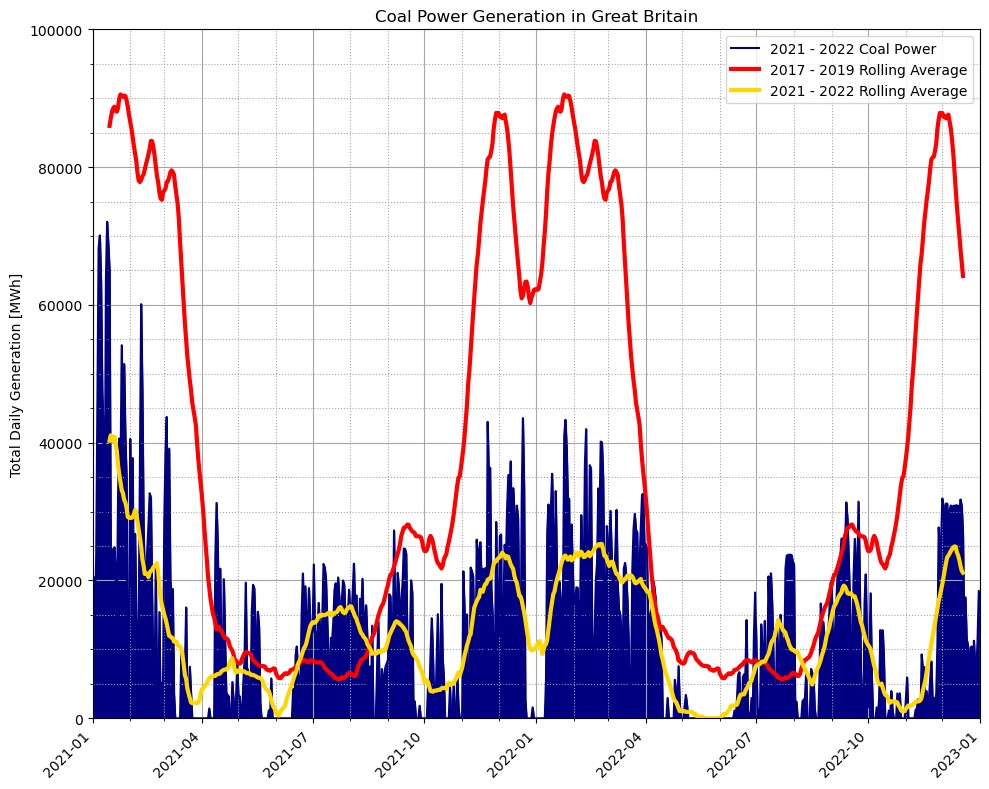

In [10]:
GBGen = pd.concat([GBGen2021["Wind [MWh]"], GBGen2022["Wind [MWh]"]], ignore_index=True).to_frame("Wind [MWh]")
GBGen["PSH [MWh]"] = pd.concat([GBGen2021["PSH [MWh]"], GBGen2022["PSH [MWh]"]], ignore_index=True).to_frame("PSH [MWh]")
GBGen["Hydro [MWh]"] = pd.concat([GBGen2021["Hydro [MWh]"], GBGen2022["Hydro [MWh]"]], ignore_index=True).to_frame("Hydro [MWh]")
GBGen["Nuclear [MWh]"] = pd.concat([GBGen2021["Nuclear [MWh]"], GBGen2022["Nuclear [MWh]"]], ignore_index=True).to_frame("Nuclear [MWh]")
GBGen["Gas [MWh]"] = pd.concat([GBGen2021["Gas [MWh]"], GBGen2022["Gas [MWh]"]], ignore_index=True).to_frame("Gas [MWh]")
GBGen["Oil [MWh]"] = pd.concat([GBGen2021["Oil [MWh]"], GBGen2022["Oil [MWh]"]], ignore_index=True).to_frame("Oil [MWh]")
GBGen["Coal [MWh]"] = pd.concat([GBGen2021["Coal [MWh]"], GBGen2022["Coal [MWh]"]], ignore_index=True).to_frame("Coal [MWh]")
GBGen["Biomass [MWh]"] = pd.concat([GBGen2021["Biomass [MWh]"], GBGen2022["Biomass [MWh]"]], ignore_index=True).to_frame("Biomass [MWh]")

GBGen["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "Wind [MWh]", "PSH [MWh]", "Hydro [MWh]", "Nuclear [MWh]",
            "Gas [MWh]", "Oil [MWh]", "Coal [MWh]", "Biomass [MWh]"]

#GBGen["Wind [MWh]"] = pd.to_numeric(GBGen["Wind [MWh]"], errors='coerce')
GBGen = pd.DataFrame(GBGen)

#GBGen["BZN|FR"] = GBGen["BZN|FR"].round(2)

GBGen = GBGen.reindex(columns=NewOrder)

print(GBGen.dtypes)


######################################################################################################################

%store -r GBGenpc

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

a = input("Choose generation type: ", )

plt.title(f"{a} Power Generation in Great Britain")
plt.ylabel('Total Daily Generation [MWh]')

plt.fill_between(GBGen["Date"], GBGen[f"{a} [MWh]"], color="navy")
ax.plot(GBGen["Date"], GBGen[f"{a} [MWh]"], color="navy", label=f"2021 - 2022 {a} Power")
ax.plot(GBGen["Date"], GBGenpc[f"{a} Mean [MWh]"].rolling(28,  center=True).mean(), linewidth = 3, color = "red", label="2017 - 2019 Rolling Average")
ax.plot(GBGen["Date"], GBGen[f"{a} [MWh]"].rolling(28,  center=True).mean(), linewidth = 3, color = "gold", label="2021 - 2022 Rolling Average")


plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_ylim())
b = input("Choose y limit:", )

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(0,int(b))
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

In [ ]:
# We have to import this again to avoid errors inherent errors in indexing

GBGen = pd.concat([GBGen2021["Wind [MWh]"], GBGen2022["Wind [MWh]"]], ignore_index=True).to_frame("Wind [MWh]")
GBGen["PSH [MWh]"] = pd.concat([GBGen2021["PSH [MWh]"], GBGen2022["PSH [MWh]"]], ignore_index=True).to_frame("PSH [MWh]")
GBGen["Hydro [MWh]"] = pd.concat([GBGen2021["Hydro [MWh]"], GBGen2022["Hydro [MWh]"]], ignore_index=True).to_frame("Hydro [MWh]")
GBGen["Nuclear [MWh]"] = pd.concat([GBGen2021["Nuclear [MWh]"], GBGen2022["Nuclear [MWh]"]], ignore_index=True).to_frame("Nuclear [MWh]")
GBGen["Gas [MWh]"] = pd.concat([GBGen2021["Gas [MWh]"], GBGen2022["Gas [MWh]"]], ignore_index=True).to_frame("Gas [MWh]")
GBGen["Oil [MWh]"] = pd.concat([GBGen2021["Oil [MWh]"], GBGen2022["Oil [MWh]"]], ignore_index=True).to_frame("Oil [MWh]")
GBGen["Coal [MWh]"] = pd.concat([GBGen2021["Coal [MWh]"], GBGen2022["Coal [MWh]"]], ignore_index=True).to_frame("Coal [MWh]")
GBGen["Biomass [MWh]"] = pd.concat([GBGen2021["Biomass [MWh]"], GBGen2022["Biomass [MWh]"]], ignore_index=True).to_frame("Biomass [MWh]")

GBGen["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "Wind [MWh]", "PSH [MWh]", "Hydro [MWh]", "Nuclear [MWh]",
            "Gas [MWh]", "Oil [MWh]", "Coal [MWh]", "Biomass [MWh]"]

#GBGen["Wind [MWh]"] = pd.to_numeric(GBGen["Wind [MWh]"], errors='coerce')
GBGen = pd.DataFrame(GBGen)

#GBGen["BZN|FR"] = GBGen["BZN|FR"].round(2)

GBGen = GBGen.reindex(columns=NewOrder)


######################################################################################################################

%store -r BZGB

GBGen["GB DAEP [EUR/MWh]"] = BZGB["BZN|GB"].astype(float)

NewOrder = ["Date", "GB DAEP [EUR/MWh]", "Wind [MWh]", "PSH [MWh]", "Hydro [MWh]", "Nuclear [MWh]",
            "Gas [MWh]", "Oil [MWh]", "Coal [MWh]", "Biomass [MWh]"]

#GBGen = pd.DataFrame(GBGen)

GBGen = GBGen.reindex(columns=NewOrder)

######################################################################################################################

fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(8)


a = input("Choose generation type: ", )

x_data = np.array(GBGen[f"{a} [MWh]"])
y_data = np.array(GBGen["GB DAEP [EUR/MWh]"])

d = max(GBGen[f"{a} [MWh]"])

if d > 1000000:
    x_data = x_data/1000000
elif 1000000 > d > 1000:
    x_data = x_data/1000

rho, p = spearmanr(x_data, y_data)

print("rho:", rho)
print("p:",p)

b = input("Linear or Exponential [l/e]:   ", )


for c in b:
    if c == "l":
        sns.regplot(x=x_data, 
            y=GBGen["GB DAEP [EUR/MWh]"].astype(float), 
            scatter = True, ci = 100, fit_reg = True,
            scatter_kws = {"color": "navy"}, line_kws = {"color": "gold"}, order=1)
        
        slope, intercept, r, GBGen, sterr = scipy.stats.linregress(x=GBGen[f"{a} [MWh]"].astype(float),
                                                       y=GBGen["GB DAEP [EUR/MWh]"].astype(float))

        textstr = '\n'.join((
            'DAEP = ' + str('%.6E' % Decimal(slope)) + f' × {a} + ' + str('%.6E' % Decimal(intercept)),
            'Spearmans ' + r'$\rho$'' = ' + str('%.6E' % Decimal(rho)),
            'Spearmans p = ' + str('%.6E' % Decimal(p))))
        
        MGB = slope
        CGB = intercept

    elif c == "e":
        sns.regplot(x=x_data, 
            y=GBGen["GB DAEP [EUR/MWh]"].astype(float), 
            scatter = True, ci = 100, fit_reg = False,
            scatter_kws = {"color": "navy"}, order=1)
        
        log_y_data = np.log(y_data)

        curve_fit = np.polyfit(x_data, log_y_data, 1)

        ycurve = np.exp(curve_fit[1])*np.exp(curve_fit[0]*x_data)

        plt.plot(x_data, ycurve, color="gold")

        A = curve_fit[0]
        B = np.exp(curve_fit[1])
        
        textstr = '\n'.join((
            'DAEP = ' + str('%.6E' % Decimal(B)) + ' × exp(' + str('%.6E' % Decimal(A)) + f' × {a})',
            'Spearmans ' + r'$\rho$'' = ' + str('%.6E' % Decimal(rho)),
            'Spearmans p = ' + str('%.6E' % Decimal(p))))
        
        AGB = A
        BGB = B
        
print(A)
print(B)
        
print("x min: ", min(x_data))
print("x max: ", max(x_data))
        
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

xb = input("Choose textbox x-coordinate [0.00-1.00]: ", )

ax.text(float(xb), 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

plt.title(f'{a} Power Generation against DAEP for Great Britain')

if 1000 > d:
    plt.xlabel(f'Daily {a} Power Generation [MWh]')
elif 1000000 > d > 1000:
    plt.xlabel(f'Daily {a} Power Generation [GWh]')
elif d > 1000000:
    plt.xlabel(f'Daily {a} Power Generation [TWh]')

plt.ylabel('Day-Ahead Price of Electricity DAEP [EUR/MWh]')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

m = input("Choose min x limit: ", )
n = input("Choose max x limit: ", )

plt.xlim(float(m), float(n))
plt.ylim(0, 800)
plt.tight_layout()

plt.show()

In [ ]:
%store rho
%store p
%store GBGen

%store MGB
%store CGB
%store AGB
%store BGB

In [ ]:
r = BGB*np.exp(AGB*500)
print(r)